<a href="https://colab.research.google.com/github/mohamedehab00/NewsCategorize-Classical-ML/blob/main/NewsCategorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Essential Imports**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns 



In [ ]:
!gdown --id 1-04keZqOp2SvkQhTMyF4gGAk0_u7Zr4C

Downloading...
From: https://drive.google.com/uc?id=1-04keZqOp2SvkQhTMyF4gGAk0_u7Zr4C
To: /content/BBC News.csv
100% 3.35M/3.35M [00:00<00:00, 98.6MB/s]


# Downloads

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

# Importing Data & Visualization

In [ ]:
Data = pd.read_csv("/content/BBC News.csv") 
Data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
print(Data.shape[0],"Articles")

1490 Articles


In [ ]:
Categories = Data["Category"].value_counts()
Categories

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [ ]:
Categories.sum()

1490

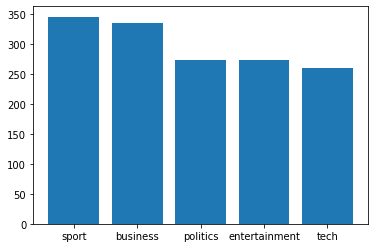

In [ ]:
plt.bar(Categories.index,Categories.values)
plt.show()

# Preprocessing


***1- Drop irrelevant Columns***

***2- Convert all the text to lower case***

***3- Remove all irrelevant characters***

***4- Remove all StopWords***

***5- Encode Categories***

In [ ]:
def DropIrrelevant(Data,cols):  
  return Data.drop(cols,axis=1)

def removeStopWords(text):
  text = text.split()
  newText = ""
  for word in text:
    if word not in stop_words:
      newText += word+" "
  return newText.strip()

def applyFuncs(Data, textLabel):
  Data[textLabel] = Data[textLabel].apply(lambda x : x.lower())
  Data[textLabel] = Data[textLabel].apply(lambda x : re.sub("[^a-z0-9\s]","",x))
  Data[textLabel] = Data[textLabel].apply(lambda x : re.sub("\s+"," ",x))
  Data[textLabel] = Data[textLabel].apply(lambda x : removeStopWords(x))
  return Data

def Encoding(Data, labelCol):
  encoder = LabelEncoder()
  return encoder.fit_transform(Data[labelCol])

******



# Preprocessing Pipeline

In [ ]:
def PreprocessPipeline(DataFrameObj, textCol, labelCol):
  Irrelevant_Cols = np.setdiff1d(DataFrameObj.columns, np.array([textCol, labelCol]))
  DataFrameObj = DropIrrelevant(DataFrameObj , list(Irrelevant_Cols))
  DataFrameObj = applyFuncs(DataFrameObj, textCol)
  DataFrameObj[labelCol] = Encoding(DataFrameObj, labelCol)
  return DataFrameObj

Data = PreprocessPipeline(Data, "Text", "Category")
Data.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


# Feature Selection

In [ ]:
def createFeatures(DataFrameObj, textCol):
  vectorizer = TfidfVectorizer()
  features = vectorizer.fit_transform(DataFrameObj[textCol])
  return features.toarray()

In [ ]:
features = createFeatures(Data, "Text")

# Apply Models



1.   Gaussian NB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Data["Category"], test_size=0.2, random_state=7, stratify=Data["Category"])

In [ ]:
NB_Model = GaussianNB()
NB_Model.fit(X_train,y_train)
y_pred = NB_Model.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 92.9530201342282


In [ ]:
print(classification_report(y_test, y_pred, target_names=["business","entertainment","politics","sports","tech"]))

               precision    recall  f1-score   support

     business       0.90      0.93      0.91        67
entertainment       0.93      0.95      0.94        55
     politics       0.94      0.87      0.91        55
       sports       1.00      0.97      0.99        69
         tech       0.87      0.92      0.90        52

     accuracy                           0.93       298
    macro avg       0.93      0.93      0.93       298
 weighted avg       0.93      0.93      0.93       298



In [ ]:
conf_NB_Model=confusion_matrix(y_test,y_pred)

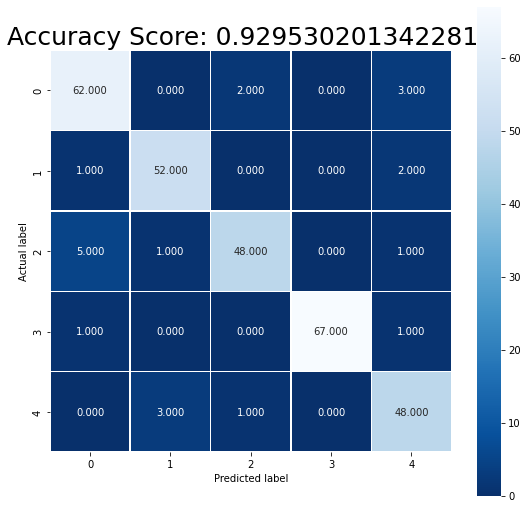

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_NB_Model, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 25);

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Random Forest model accuracy(in %): 95.63758389261746


In [ ]:
conf_RandomForestClassifier=confusion_matrix(y_test,y_pred)

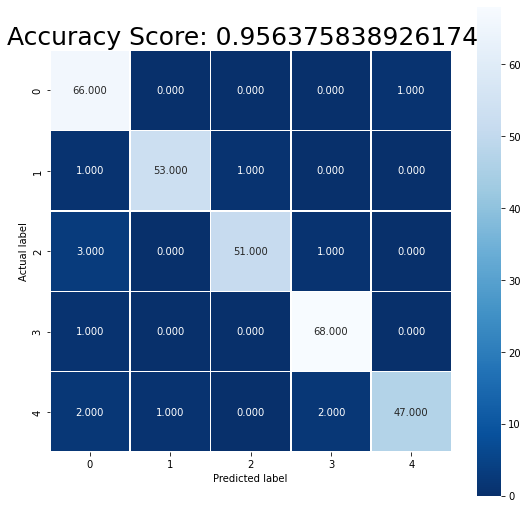

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_RandomForestClassifier, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 25);

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

KNN model accuracy(in %): 94.96644295302013


In [ ]:
conf_KNeighborsClassifier=confusion_matrix(y_test,y_pred)

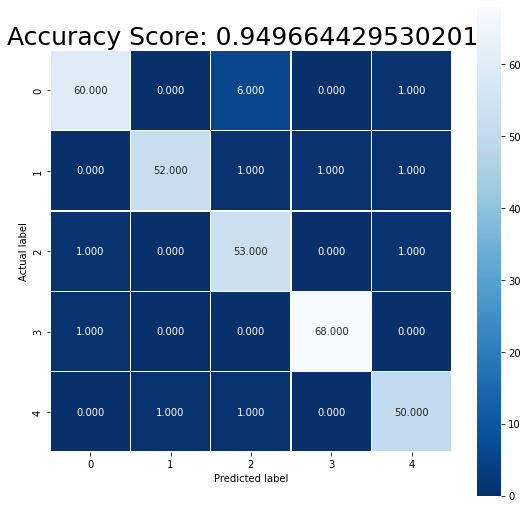

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_KNeighborsClassifier, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 25);

In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)

In [ ]:
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)

Best score for training data: 0.9723111001722865 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [ ]:
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

SVM model accuracy(in %): 94.96644295302013


In [ ]:
conf_svm=confusion_matrix(y_test,y_pred)

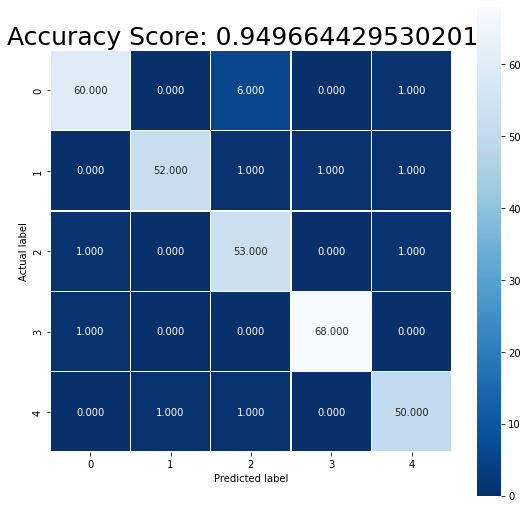

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_svm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 25);

In [ ]:
from sklearn.ensemble import VotingClassifier
NB = GaussianNB()
SVC = SVC(C=1000,kernel="rbf",gamma=0.001)
RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
knn = KNeighborsClassifier(n_neighbors=5)
evc = VotingClassifier( estimators= [('GaussianNB',NB),('SVC',SVC),('knn',knn),('RandomForestClassifier', RandomForestClassifier)], voting = 'hard')

In [ ]:
evc.fit(X_train,y_train)

VotingClassifier(estimators=[('GaussianNB', GaussianNB()),
                             ('SVC', SVC(C=1000, gamma=0.001)),
                             ('knn', KNeighborsClassifier()),
                             ('RandomForestClassifier',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=1000,
                                                     random_state=42))])

In [ ]:
evc.score(X_test,y_test)

0.9630872483221476

In [ ]:
y_pred=evc.predict(X_test)

In [ ]:
print("Ensemble model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Ensemble model accuracy(in %): 96.30872483221476


In [ ]:
conf_evc=confusion_matrix(y_test,y_pred)

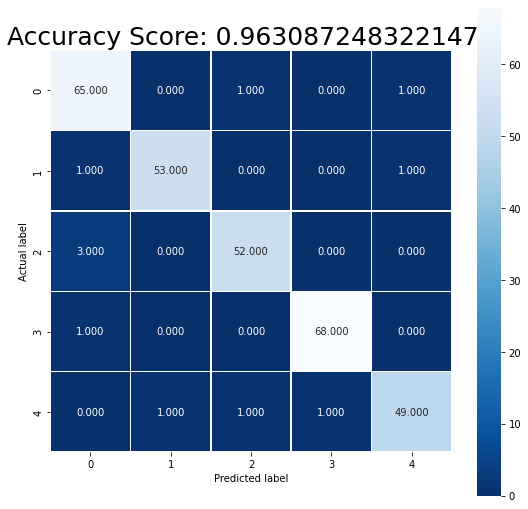

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_evc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 25);